<a href="https://colab.research.google.com/github/deltorobarba/astrophysics/blob/main/configuration_interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuration Interaction (CI)**

[Configuration interaction (CI)](https://en.m.wikipedia.org/wiki/Configuration_interaction) is a is a post-Hartree-Fock linear variational method used in quantum chemistry to account for electron correlation. The simplest form is CISD (Configuration Interaction with Single and Double excitations).

Configuration interaction is used for solving the nonrelativistic Schrödinger equation within the Born–Oppenheimer approximation for a quantum chemical multi-electron system. Mathematically, **configuration simply describes the linear combination of Slater determinants used for the wave function.**

In terms of a specification of orbital occupation (for instance,
$\left.(1 \mathrm{~s})^{2}(2 \mathrm{~s})^{2}(2 \mathrm{p})^{1} \ldots\right)$, interaction means the mixing (interaction) of
different electronic configurations (states).

* Due to the long
$\mathrm{CPU}$ time and large memory required for $\mathrm{Cl}$ calculations, the
method is limited to relatively small systems.

* In contrast to the Hartree-Fock method, in order to account for
electron correlation, $\mathrm{Cl}$ **uses a variational wave function that is
a linear combination of configuration state functions (CSFs)
built from spin orbitals (denoted by the superscript SO)**,

> $\Psi=\sum_{I=0} c_{I} \Phi_{I}^{S O}=c_{0} \Phi_{0}^{S O}+c_{1} \Phi_{1}^{S O}+\ldots$

* where $\Psi$ is usually the electronic ground state of the system.

* If
the expansion includes all possible CSFs of the appropriate
symmetry, then this is a full configuration interaction

**Calculate Configuration Interaction a small molecule like H₂:**

In [ ]:
!pip install pyscf -q

In [1]:
!pip install pyscf -q
from pyscf import gto, scf, ci

# Step 1: Define the molecule
# H2 molecule with a bond length of 0.74 angstroms
mol = gto.M(
    atom = 'H 0 0 0; H 0 0 0.74',  # Specify the atomic coordinates
    basis = 'sto-3g',               # Choose a basis set
    symmetry = True
)

# Step 2: Perform Hartree-Fock (SCF) calculation
mf = scf.RHF(mol)  # Restricted Hartree-Fock for a closed-shell system
mf.kernel()        # Compute the SCF solution

# Step 3: Configuration Interaction calculation (CISD)
myci = ci.CISD(mf)
myci.kernel()  # Perform the CISD calculation

# Print the CISD total energy
print(f'CISD total energy: {myci.e_tot:.6f} Ha')

# Step 4: Analyze results (Optional)
# You can also print out more details, like the CI coefficients or excitation amplitudes
print("\nCISD coefficients:")
print(myci.ci)

# Final Output of Total Energy and Coefficients

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 MB 9.3 MB/s eta 0:00:00
converged SCF energy = -1.11675930739643
E(RCISD) = -1.137283834488502  E_corr = -0.02052452709207653
CISD total energy: -1.137284 Ha

CISD coefficients:
[-9.93646755e-01  1.20053582e-16  1.12543887e-01]


1. Molecule Definition: This defines an H₂ molecule with a bond length of 0.74 Å and uses the STO-3G basis set.
2. SCF Calculation: The Hartree-Fock method is used to get the mean-field solution.
3. CISD Calculation: The CISD method is applied on top of the SCF results to capture electron correlation.
4. Results Analysis: Outputs the CISD total energy and the CI coefficients.

*Code is adaptable this for larger molecules or different basis sets, or to explore more advanced CI methods like CCSD (Coupled Cluster with Single and Double excitations)*

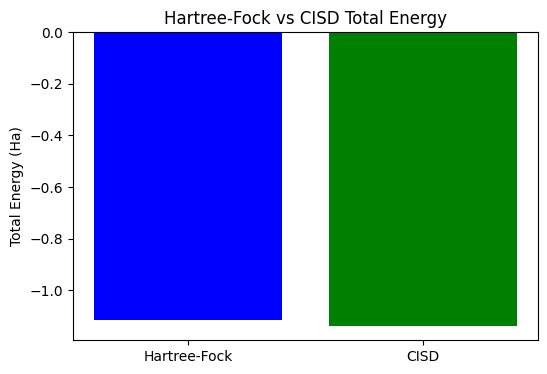

In [2]:
import matplotlib.pyplot as plt

# Collect the energies
hf_energy = mf.e_tot  # Hartree-Fock energy
cisd_energy = myci.e_tot  # CISD total energy

# Step 1: Plot the energies
energies = [hf_energy, cisd_energy]
labels = ['Hartree-Fock', 'CISD']

plt.figure(figsize=(6, 4))
plt.bar(labels, energies, color=['blue', 'green'])
plt.ylabel('Total Energy (Ha)')
plt.title('Hartree-Fock vs CISD Total Energy')
plt.show()


In [3]:
# Visualizing the Molecular Orbitals

# Import the tools for plotting orbitals
from pyscf.tools import molden

# Create a .molden file to visualize molecular orbitals using external viewers like Jmol or Molden
with open('h2_molecular_orbitals.molden', 'w') as f:
    molden.header(mol, f) # Write molecular header
    molden.orbital_coeff(mol, f, mf.mo_coeff)  # Write the molecular orbitals

print("Molecular orbitals saved to 'h2_molecular_orbitals.molden'. You can view it using a tool like Jmol or Molden.")

Molecular orbitals saved to 'h2_molecular_orbitals.molden'. You can view it using a tool like Jmol or Molden.


**Visualizing the molecular orbitals**

* Take file called h2_molecular_orbitals.molden
* Install a Molecular Viewer by installing Molden from Molden’s official website (alternatively Jmol or Avogadro)
* Open Molden and load h2_molecular_orbitals.molden file.
* Result: 3D view of H₂ molecule with options to view the orbitals.